In [2]:
%pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio-

Saving WIN_20250624_02_10_36_Pro.jpg to WIN_20250624_02_10_36_Pro.jpg
Uploaded file: WIN_20250624_02_10_36_Pro.jpg
0 554 521
1 616 429
2 665 335
3 680 254
4 663 165
5 580 357
6 724 367
7 721 383
8 678 389
9 558 439
10 742 456
11 719 466
12 665 469
13 555 523
14 720 534
15 692 537
16 641 535
17 554 593
18 679 610
19 664 601
20 627 592


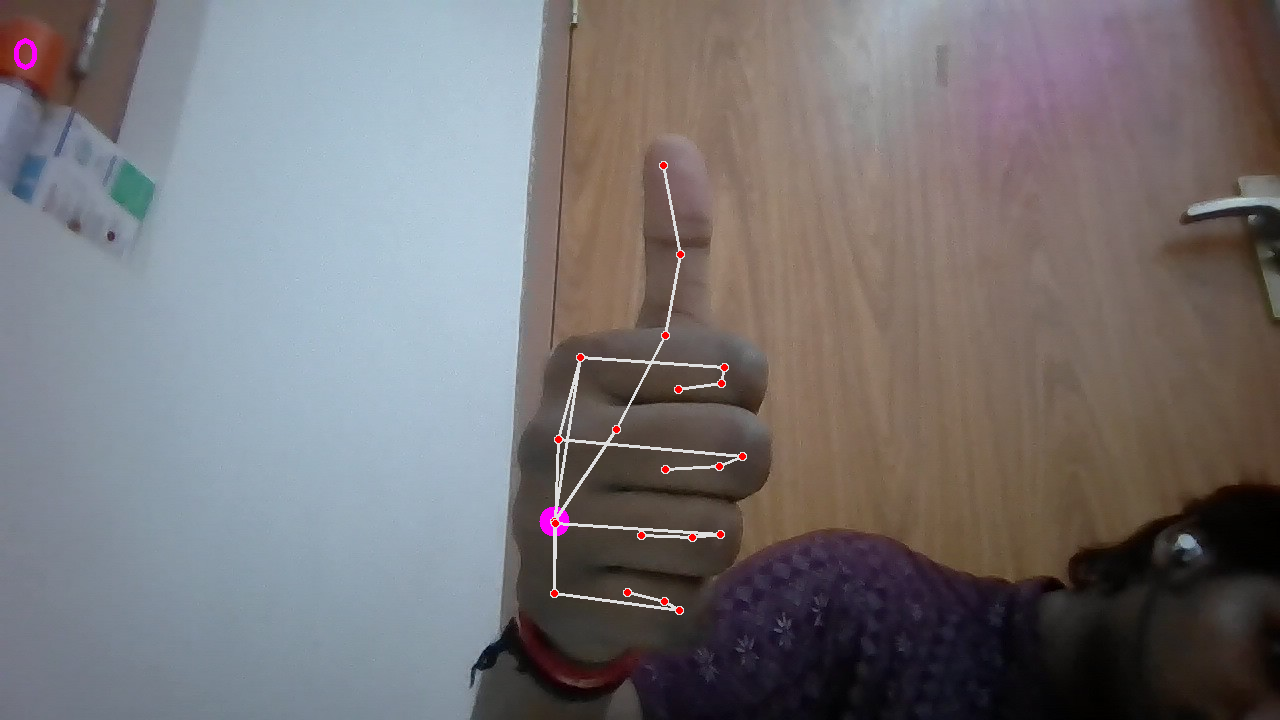

In [ ]:
import cv2
import mediapipe as mp
import time
from google.colab import files

# Step 1: Upload an image
uploaded = files.upload()
ctime=0
ptime=0
# Get the uploaded image filename
image_file = next(iter(uploaded))
print("Uploaded file:", image_file)


# Step 2: Read the image
img = cv2.imread(image_file)

# Step 3: Initialize MediaPipe Hands
mphands = mp.solutions.hands
hands = mphands.Hands(static_image_mode=True, max_num_hands=2)
mpDraw = mp.solutions.drawing_utils

# Step 4: Process the image
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = hands.process(imgRGB)

# Step 5: Draw landmarks
if results.multi_hand_landmarks:
    for handLms in results.multi_hand_landmarks:
        for id, lm in enumerate(handLms.landmark):
            h, w, c = img.shape
            cx, cy = int(lm.x * w), int(lm.y * h)
            print(id,cx,cy)
            if id==0:
              cv2.circle(img,(cx,cy),15,(255,0,255),cv2.FILLED)
        mpDraw.draw_landmarks(img, handLms, mphands.HAND_CONNECTIONS)

ctime=time.time()
fps=1/(ctime-ptime)
ptime=ctime
cv2.putText(img,str(int(fps)),(10,70),cv2.FONT_HERSHEY_PLAIN,3,(255,0,255),3)

# Step 6: Display result in Colab
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# Cleanup
hands.close()


In [ ]:
import cv2
import mediapipe as mp
from google.colab import files
import time

# Step 1: Upload an image
uploaded = files.upload()
ctime = 0
ptime = 0

# Get the uploaded image filename
image_file = next(iter(uploaded))
print("Uploaded file:", image_file)

# Step 2: Read the image
img = cv2.imread(image_file)

# Step 3: Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)
mp_draw = mp.solutions.drawing_utils

# Step 4: Process the image
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = pose.process(imgRGB)

# Step 5: Draw landmarks
if results.pose_landmarks:
    print("Pose landmarks detected.")
    mp_draw.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Example: draw circles on key landmarks
    for id, lm in enumerate(results.pose_landmarks.landmark):
        h, w, c = img.shape
        cx, cy = int(lm.x * w), int(lm.y * h)
        # Example: draw circle on landmark 0
        print(id,lm)
        if id == 0:
            cv2.circle(img, (cx, cy), 15, (255, 0, 255), cv2.FILLED)
else:
    print("No pose landmarks detected.")

# FPS calculation (not really needed for image, but kept like your hand code)
ctime = time.time()
fps = 1 / (ctime - ptime)
ptime = ctime
cv2.putText(img, str(int(fps)), (10, 70), cv2.FONT_HERSHEY_PLAIN, 3, (255, 0, 255), 3)

# Step 6: Display result in Colab
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# Cleanup
pose.close()


Output hidden; open in https://colab.research.google.com to view.

Face detection

Saving pexels-pixabay-415829.jpg to pexels-pixabay-415829.jpg
Uploaded file: pexels-pixabay-415829.jpg
<class 'mediapipe.python.solution_base.SolutionOutputs'>
xmin: 0.292945564
ymin: 0.229590431
width: 0.378580213
height: 0.378541827



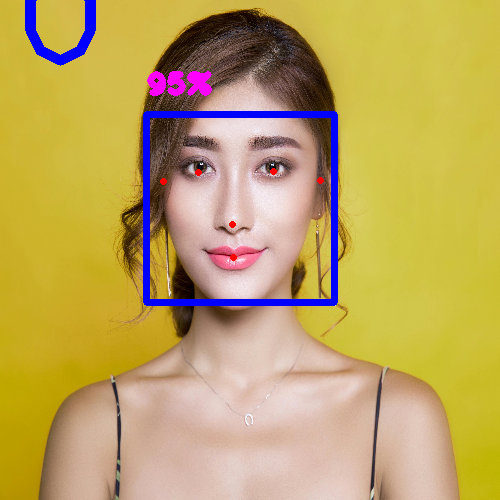

NameError: name 'pose' is not defined

In [4]:
import cv2
import mediapipe as mp
import time

uploaded = files.upload()
ctime = 0
ptime = 0

# Get the uploaded image filename
image_file = next(iter(uploaded))
print("Uploaded file:", image_file)

# Step 2: Read the image
img = cv2.imread(image_file)
img=cv2.resize(img,(500,500))
mpfacedetection=mp.solutions.face_detection
mpDraw=mp.solutions.drawing_utils
facedetection=mpfacedetection.FaceDetection()

imgRGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
results=facedetection.process(imgRGB)
print(results)

if results.detections:
  for id,detection in enumerate(results.detections):
    mpDraw.draw_detection(img,detection)
    print(detection.location_data.relative_bounding_box)
    bbox=detection.location_data.relative_bounding_box
    ih,iw,ic=img.shape
    bbox=int(bbox.xmin*iw),int(bbox.ymin*ih),int(bbox.width*iw),int(bbox.height*ih)
    cv2.rectangle(img,bbox,(255,0,0),5)
    cv2.putText(img,f'{int(detection.score[0]*100)}%',(bbox[0],bbox[1]-20),cv2.FONT_HERSHEY_PLAIN,2 ,(255,0,255),5)



ctime = time.time()
fps = 1 / (ctime - ptime)
ptime = ctime
cv2.putText(img, str(int(fps)), (10, 70), cv2.FONT_HERSHEY_PLAIN, 10, (255, 0,0), 10)

# Step 6: Display result in Colab
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# Cleanup
pose.close()

face mesh

Saving pexels-1000990-1954659.jpg to pexels-1000990-1954659.jpg
Uploaded file: pexels-1000990-1954659.jpg
2 face(s) detected.
Landmark 0: (278, 325)
Landmark 1: (277, 310)
Landmark 2: (277, 318)
Landmark 3: (271, 299)
Landmark 4: (276, 306)
Landmark 0: (618, 275)
Landmark 1: (608, 262)
Landmark 2: (614, 268)
Landmark 3: (605, 251)
Landmark 4: (607, 258)


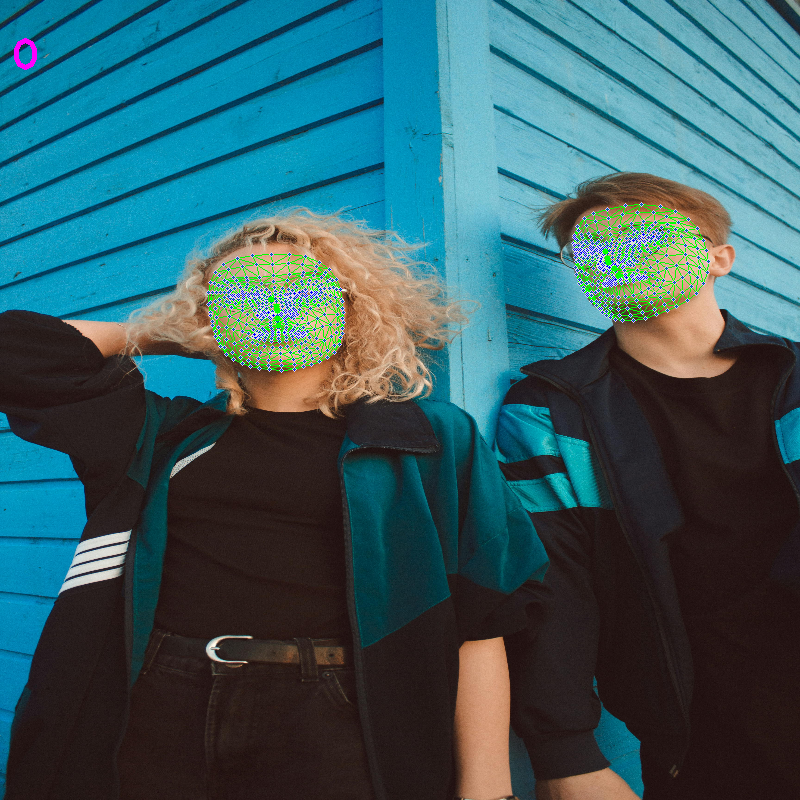

In [3]:
import cv2
import mediapipe as mp
from google.colab import files
import time

# Step 1: Upload an image
uploaded = files.upload()
ctime = 0
ptime = 0

# Get the uploaded image filename
image_file = next(iter(uploaded))
print("Uploaded file:", image_file)

# Step 2: Read the image
img = cv2.imread(image_file)
img=cv2.resize(img,(800,800))

# Step 3: Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2, refine_landmarks=True)
mp_draw = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# drawspecs=mp_draw.DrawingSpec(thickness=4,circle_radius=4)

# Step 4: Process the image
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = face_mesh.process(imgRGB)

# Step 5: Draw landmarks
if results.multi_face_landmarks:
    print(f"{len(results.multi_face_landmarks)} face(s) detected.")
    for face_landmarks in results.multi_face_landmarks:
        mp_draw.draw_landmarks(
            image=img,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec = mp_draw.DrawingSpec(color=(255,0,0), thickness=1, circle_radius=1),
            connection_drawing_spec = mp_draw.DrawingSpec(color=(0,255,0), thickness=1)

        )

        # Optionally: draw circles on some key points (example: first 5 points)
        for id, lm in enumerate(face_landmarks.landmark):
            if id < 5:  # Just showing first 5 points as example
                h, w, c = img.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                cv2.circle(img, (cx, cy), 3, (0, 255, 0), cv2.FILLED)
                print(f"Landmark {id}: ({cx}, {cy})")
else:
    print("No face landmarks detected.")

# FPS calculation (not really needed for image, but kept as example)
ctime = time.time()
fps = 1 / (ctime - ptime)
ptime = ctime
cv2.putText(img, str(int(fps)), (10, 70), cv2.FONT_HERSHEY_PLAIN, 3, (255, 0, 255), 3)

# Step 6: Display result in Colab
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# Cleanup
face_mesh.close()
